<a href="https://colab.research.google.com/github/eshakmahmed7/CVPR/blob/master/18-38088-2%20Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import KFold
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
(train_imgs, train_labels),(test_imgs, test_labels)= tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
print(f"train img shape{train_imgs.shape}")
print(f"train img shape{train_labels.shape}")
print(f"test img shape{train_imgs.shape}")
print(f"test img shape{train_labels.shape}")
print("test img data type :",type(train_imgs))

train img shape(50000, 32, 32, 3)
train img shape(50000, 1)
test img shape(50000, 32, 32, 3)
test img shape(50000, 1)
test img data type : <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


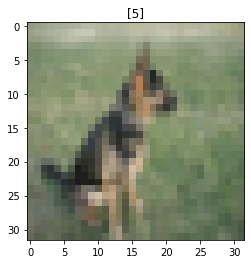

In [4]:
i = 26543
plt.figure()
plt.imshow(train_imgs[i], cmap=plt.cm.gray_r)
plt.title(train_labels[i])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


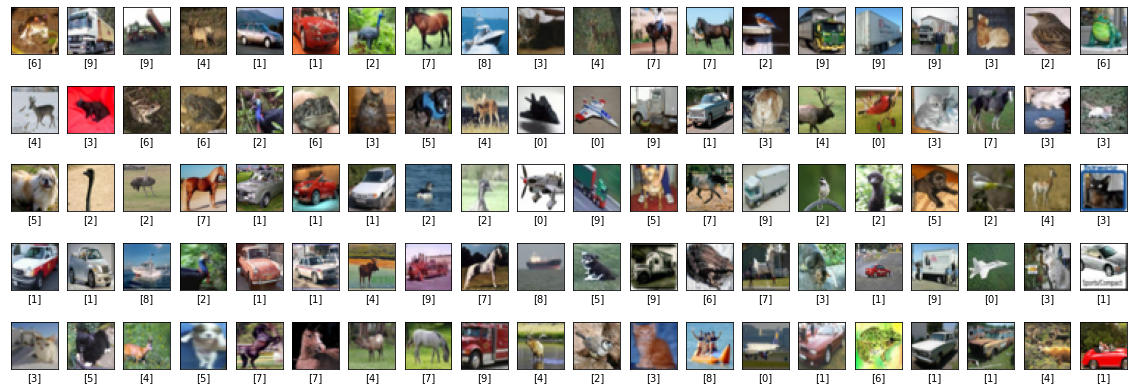

In [5]:
R = 5
C = 20
i = 0

plt.figure(figsize=(20,7))
for r in range(R):
    for c in range(C):
        plt.subplot(R,C,i+1)
        plt.imshow(train_imgs[i], cmap='gray_r')
        plt.xlabel(train_labels[i])
        plt.xticks([])
        plt.yticks([])
        i += 1

In [6]:
train_imgs_reshaped = train_imgs.reshape(-1, 32*32*3).astype('float32')/255
print(f"train img reshape{train_imgs_reshaped.shape}")
# print(train_imgs[0].shape)
# print(train_imgs_reshaped[0].shape)

train img reshape(50000, 3072)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=3072),
    tf.keras.layers.Dense(units=110, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 110)               338030    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                2664      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250       
Total params: 340,944
Trainable params: 340,944
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=train_imgs_reshaped, y=train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2013 - accuracy: 0.1601 - val_loss: 2.0117 - val_accuracy: 0.2496
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9176 - accuracy: 0.2803 - val_loss: 1.8534 - val_accuracy: 0.3165
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8102 - accuracy: 0.3412 - val_loss: 1.7813 - val_accuracy: 0.3539
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7538 - accuracy: 0.3628 - val_loss: 1.7376 - val_accuracy: 0.3685
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7087 - accuracy: 0.3807 - val_loss: 1.7371 - val_accuracy: 0.3692
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6680 - accuracy: 0.4006 - val_loss: 1.6826 - val_accuracy: 0.4030
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6412 - accuracy: 0.4092 - val_loss: 1.6715 - val_accuracy:

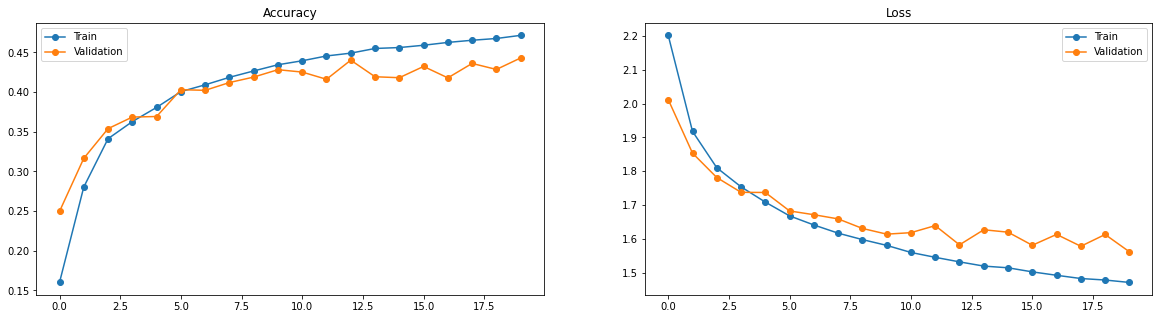

In [10]:
# h = keras.models.load_model('/content/drive/MyDrive/CVPR/my_model.h5')
# print(h.keys())
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')
plt.legend(['Train', 'Validation'])
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '-o')
plt.plot(h.history['val_loss'], '-o')
plt.legend(['Train', 'Validation'])
plt.title('Loss')
plt.show()

# **UTILITY FUNCTIONS:**

In [11]:
def getL2DistanceMatrix(train,test):
  num_test = test.shape[0]
  num_train = train.shape[0]
  L2_dists = np.zeros((num_test, num_train))
  # L1_dists = np.zeros((num_test, num_train))
  for i in range(num_test):
    # L1_dists[i, :] = np.sum(np.square(X_test[i] - X_train), axis=1)
    L2_dists[i, :] = np.sqrt(np.sum(np.square(X_test[i] - X_train), axis=1))
  return L2_dists

def predict(distance, k=1):
  num_test = distance.shape
  y_pred = np.zeros(num_test)
  for i in range(num_test):
    closest_y = []
    closest_y = np.take(y_train, np.argsort(distance[i]))[:k]
    (values, counts) = np.unique(closest_y, return_counts=True)
    y_pred[i] = values[np.argmax(counts)]

    return y_pred

# **L1 & L2 Distance Matrix:**

In [12]:
X_train = train_imgs
y_train = train_labels[:,0]
X_test = test_imgs
y_test = test_labels[:,0]

num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

num_test = X_test.shape[0]
num_train = X_train.shape[0]
L2_dists = np.zeros((num_test, num_train))
L1_dists = np.zeros((num_test, num_train))
for i in range(num_test):
    L1_dists[i, :] = np.sum(np.square(X_test[i] - X_train), axis=1)
    L2_dists[i, :] = np.sqrt(np.sum(np.square(X_test[i] - X_train), axis=1))

print("L1 Matrix : ",L1_dists)
print("L2 Matrix : ",L2_dists)


(5000, 3072) (500, 3072)
L1 Matrix :  [[320202. 322911. 329559. ... 318775. 328690. 326376.]
 [323653. 328556. 345940. ... 321170. 332665. 330365.]
 [324224. 322045. 327531. ... 323683. 318426. 319236.]
 ...
 [335259. 322262. 320402. ... 325350. 326027. 326029.]
 [321336. 323477. 317605. ... 334015. 324710. 323762.]
 [319813. 315252. 327596. ... 328426. 330491. 332633.]]
L2 Matrix :  [[565.86394124 568.25258468 574.0722951  ... 564.60162947 573.31492219
  571.2932697 ]
 [568.90508875 573.19804605 588.16664305 ... 566.71862507 576.77118513
  574.77386858]
 [569.40670878 567.49008802 572.3032413  ... 568.93145457 564.29247736
  565.00973443]
 ...
 [579.01554383 567.68124859 566.04063458 ... 570.39460025 570.98774067
  570.98949202]
 [566.86506331 568.75038462 563.56454821 ... 577.94030834 569.83330896
  569.00087873]
 [565.52011458 561.47306258 572.36002656 ... 573.08463598 574.88346645
  576.74344383]]


# **CROSS VALIDATION :**

In [13]:

kfold = KFold(n_splits=5, shuffle = True,random_state= 1)
for train, test in kfold.split(X_train):
		print('train: %s, test: %s' % (X_train, X_test))

train: [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]], test: [[158 112  49 ...  21  67 110]
 [235 235 235 ... 186 200 199]
 [158 190 222 ...   7   8   7]
 ...
 [ 74 126 176 ... 141 199 251]
 [145 162 125 ... 117 119 105]
 [185 189 188 ... 211 212 206]]
train: [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]], test: [[158 112  49 ...  21  67 110]
 [235 235 235 ... 186 200 199]
 [158 190 222 ...   7   8   7]
 ...
 [ 74 126 176 ... 141 199 251]
 [145 162 125 ... 117 119 105]
 [185 189 188 ... 211 212 206]]
train: [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]], test

In [14]:


# k=5
# kf = KFold(n_splits=k, shuffle = True,random_state= None)
# # model = LogisticRegression(solver= 'liblinear')
# acc_score = []
 
# for train_index , test_index in kf.split(X_train):
#     X_train , X_test = X_train[train_index,:],X_train[test_index,:]
#     y_train , y_test = y_train[train_index] , y_train[test_index]
     
#     model.fit(X_train,y_train)
#     pred_values = model.predict(X_test)

     
#     acc = accuracy_score(pred_values , y_test)
#     acc_score.append(acc)
     
# avg_acc_score = sum(acc_score)/k



# for train, test in kfold.split(X_train):
# 		print('train: %s, test: %s' % (X_train, X_test))
#     k_mean, k_min, k_max = evaluate_model(kfold)
#     # report performance
#     print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
#     # store mean accuracy
#     means.append(k_mean)
#     # store min and max relative to the mean
#     mins.append(k_mean - k_min)
#     maxs.append(k_max - k_mean)
# # line plot of k mean values with min/max error bars
# pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# # plot the ideal case in a separate color
# pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# # show the plot
# pyplot.show()